# Importamos las librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wolta.data_tools import list_deletings
from wolta.data_tools import stat_sum
from wolta.data_tools import make_numerics
from wolta.data_tools import expand_df
from wolta.model_tools import compare_models
from wolta.model_tools import get_best_model

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report as rep
from sklearn.metrics import confusion_matrix as conf
from sklearn.metrics import ConfusionMatrixDisplay as cmd

## Cargamos el dataset

In [2]:
df_alm = pd.read_csv("C:/Users/mitev/Desktop/Prácticas/Almond_proyect/dataset/Almond.csv")

In [3]:
df_alm.head()

,Unnamed: 0,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,0,NaN,227.940628,127.759132,22619.0,643.813269,NaN,0.973384,1.458265,NaN,NaN,0.681193,23237.5,MAMRA
1,1,NaN,234.188126,128.199509,23038.0,680.984841,NaN,0.957304,1.601844,NaN,NaN,0.656353,24065.5,MAMRA
2,2,NaN,229.418610,125.796547,22386.5,646.943212,NaN,0.967270,1.487772,NaN,NaN,0.683620,23144.0,MAMRA
3,3,NaN,232.763153,125.918808,22578.5,661.227483,NaN,0.965512,1.540979,NaN,NaN,0.685360,23385.0,MAMRA
4,4,NaN,230.150742,107.253448,19068.0,624.842706,NaN,0.951450,1.629395,NaN,NaN,0.714800,20041.0,MAMRA


In [4]:
df_alm.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
df_alm.isnull().sum()

Length (major axis)          857
Width (minor axis)           942
Thickness (depth)           1004
Area                           0
Perimeter                      0
Roundness                    857
Solidity                       0
Compactness                    0
Aspect Ratio                1799
Eccentricity                1799
Extent                         0
Convex hull(convex area)       0
Type                           0
dtype: int64

In [6]:
# Eliminamos los valores que tengan más del 40% de valores faltantes.Imprime el resultado de esos valores faltantes. 
thresh = 0.4
cols = []

for col_ in df_alm.columns:
  per = df_alm[col_].isnull().sum() / len(df_alm)
  if per > thresh:
    print(f"{col_}\t{per}")
    cols.append(col_)
df_alm.drop(cols, axis=1, inplace=True)

Aspect Ratio	0.6418123439172315
Eccentricity	0.6418123439172315


In [7]:
df_alm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2803 entries, 0 to 2802
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Length (major axis)       1946 non-null   float64
 1   Width (minor axis)        1861 non-null   float64
 2   Thickness (depth)         1799 non-null   float64
 3   Area                      2803 non-null   float64
 4   Perimeter                 2803 non-null   float64
 5   Roundness                 1946 non-null   float64
 6   Solidity                  2803 non-null   float64
 7   Compactness               2803 non-null   float64
 8   Extent                    2803 non-null   float64
 9   Convex hull(convex area)  2803 non-null   float64
 10  Type                      2803 non-null   object 
dtypes: float64(10), object(1)
memory usage: 241.0+ KB


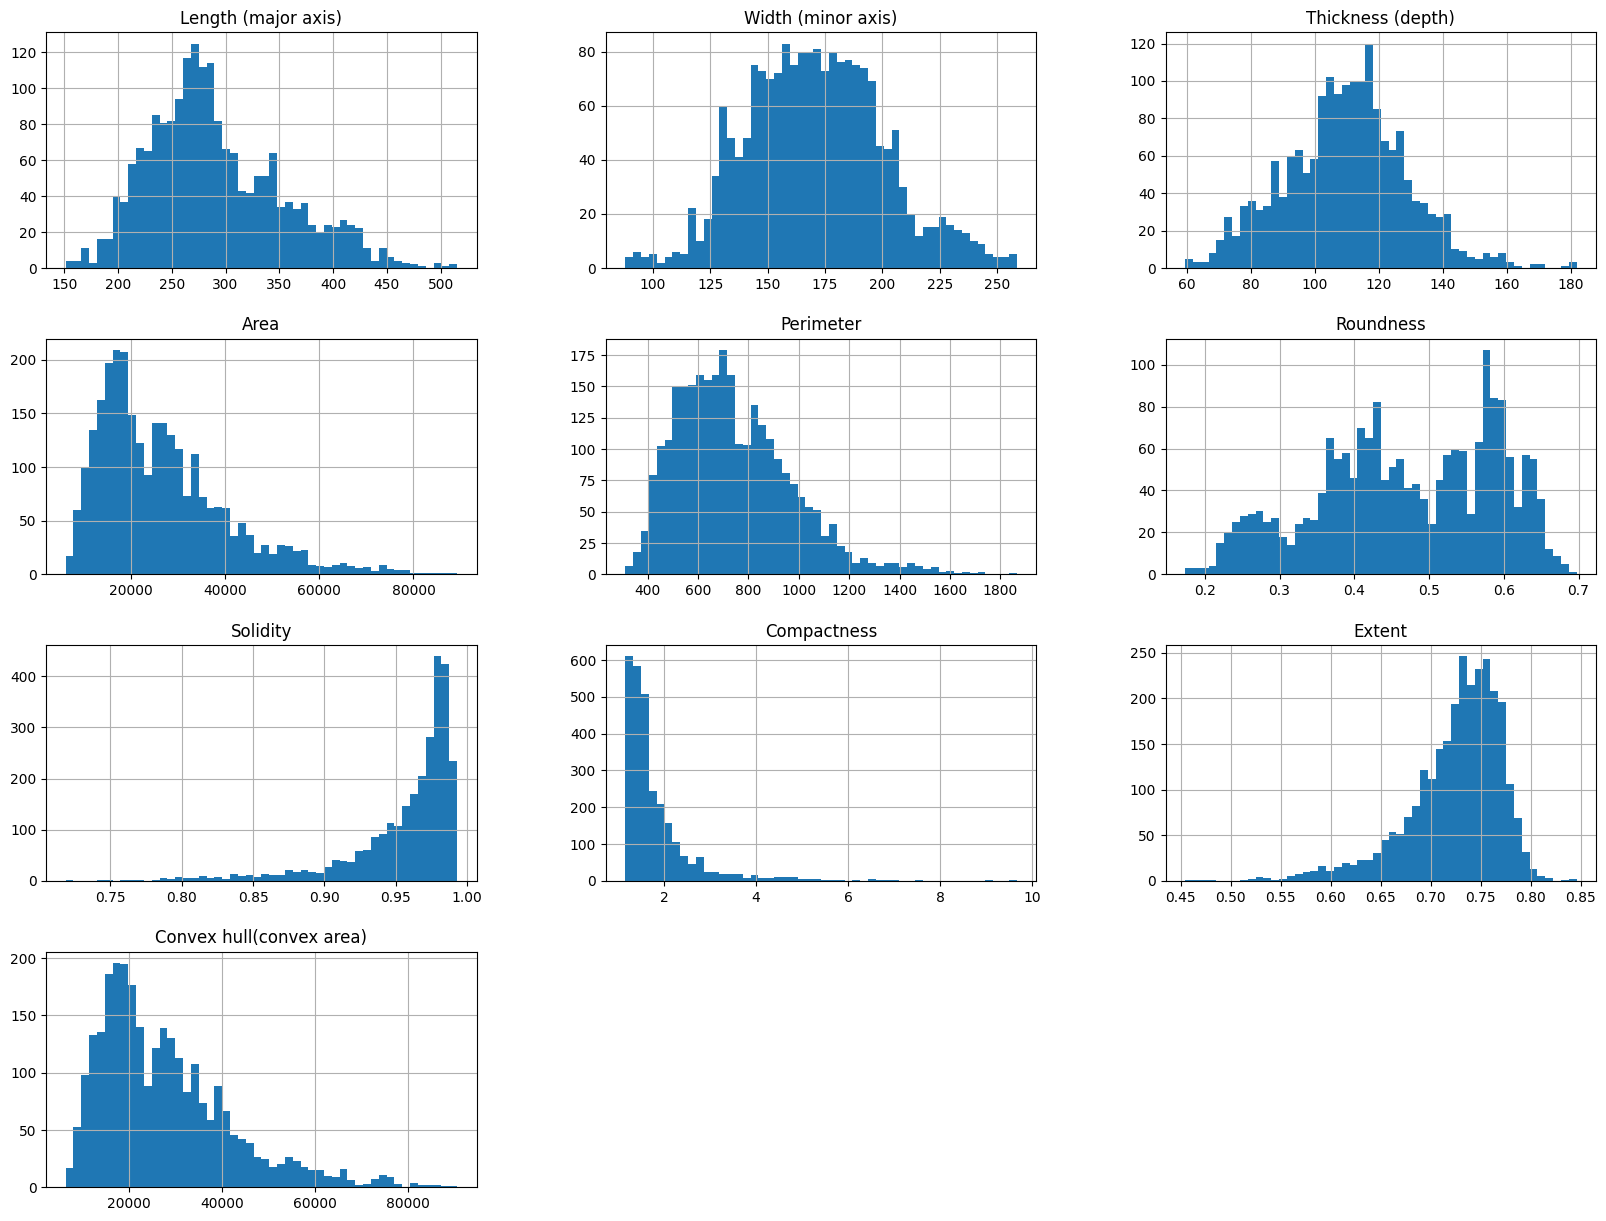

In [8]:
df_alm.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
from wolta.data_tools import list_deletings

df_alm = list_deletings(df_alm)

The maximum tolerated null value amount is 560
Length (major axis) will be deleted because it has 857 null values and this is 297 values more than tolerance
Width (minor axis) will be deleted because it has 942 null values and this is 382 values more than tolerance
Thickness (depth) will be deleted because it has 1004 null values and this is 444 values more than tolerance
Roundness will be deleted because it has 857 null values and this is 297 values more than tolerance
The maximum tolerated unique value amount is 280 in string data


In [11]:
df_alm['Type'], outs = make_numerics(df_alm['Type'], space_requested=True)

print(outs)
outs = list(outs.keys())
print(outs)

{'MAMRA': 0, 'SANORA': 1, 'REGULAR': 2}
['MAMRA', 'SANORA', 'REGULAR']


In [12]:
stat_sum(df_alm,
        ['max', 'min', 'width', 'var', 'med'])

Area
max: 89282.0
min: 6037.0
width: 83245.0
variance: 189891227.3042754
median: 23440.5
***
Perimeter
max: 1864.947386622429
min: 311.5634888410568
width: 1553.383897781372
variance: 53172.1779552602
median: 707.4873685836792
***
Solidity
max: 0.9928891229918356
min: 0.7187724633674316
width: 0.274116659624404
variance: 0.0015672620390341102
median: 0.9704222141774936
***
Compactness
max: 9.660057065957709
min: 1.1644687273008936
width: 8.495588338656816
variance: 0.6303038425285006
median: 1.5764123033491113
***
Extent
max: 0.8458125080097398
min: 0.4545377867746288
width: 0.39127472123511103
variance: 0.0022529642755831246
median: 0.7337199837199837
***
Convex hull(convex area)
max: 90642.5
min: 6355.0
width: 84287.5
variance: 202629750.86152184
median: 24589.0
***
Type
max: 2
min: 0
width: 2
variance: 0.6635701593356793
median: 1.0
***


In [13]:
df_alm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2803 entries, 0 to 2802
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Area                      2803 non-null   float64
 1   Perimeter                 2803 non-null   float64
 2   Solidity                  2803 non-null   float64
 3   Compactness               2803 non-null   float64
 4   Extent                    2803 non-null   float64
 5   Convex hull(convex area)  2803 non-null   float64
 6   Type                      2803 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 153.4 KB


In [14]:
df_alm['Type'].value_counts()

Type
1    943
0    933
2    927
Name: count, dtype: int64

In [15]:
df_alm2 = expand_df(df_alm, 'Type', 'not majority')

In [16]:
y = df_alm2['Type'].values
del df_alm2['Type']
X = df_alm2.values
del df_alm2

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
del X, y

# Modelado

In [18]:
results = compare_models('clf',
                        ['ada', 'cat', 'lbm', 'raf', 'ext', 'dtr', 'per', 'rdg'],
                        ['acc', 'precision'],
                        X_train, y_train, X_test, y_test,
                        get_result=True)

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
model = get_best_model(results, 'acc', 'clf', X_train, y_train, behavior='max-best')
y_pred = model.predict(X_test)

In [ ]:
print(rep(y_test, y_pred))

In [ ]:
cm = conf(y_test, y_pred)
disp = cmd(confusion_matrix=cm, display_labels=outs)
disp.plot()